In [1]:
import os

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from unidecode import unidecode
from datetime import datetime

### PROVINCIAS
Se realizo una visualización rápida de los datos y se detecta en cada archivo el campo "provincia", procedo a crear un dataframe que funcione como índice de provincias para luego remplazar en los demas dataframes por su correspondiente ID.

In [2]:
dfProvincias = pd.read_excel('datos/Internet_Penetracion.xlsx',sheet_name='Penetración-poblacion')          # Tomo un archivo cualquiera que contenga las provincias.
dfProvincias = dfProvincias.drop(['Año', 'Trimestre', 'Accesos por cada 100 hab'], axis = 1)            # Elimino todas las columnas menos la provincia.
dfProvincias = dfProvincias.drop_duplicates()           # Elimino los duplicados de la columna provincias.
dfProvincias = dfProvincias.sort_values(by = 'Provincia').reset_index()           # Ordeno los valores alfabeticamente.

dfProvincias['Provincia'] = dfProvincias['Provincia'].apply(lambda x: unidecode(x))         # Quitamos los signos ortográficos.

dfProvincias ['id'] = dfProvincias.index + 1            # Creo un nuevo id para cada provincia.

In [3]:
dfProvincias.head()

,index,Provincia,id
0,0,Buenos Aires,1
1,36,Capital Federal,2
2,72,Catamarca,3
3,108,Chaco,4
4,144,Chubut,5


### PENETRACION HOGARES
De este archivo excel tomaremos ambas hojas y las plasmaremos en un mismo dataframe.

In [4]:
dfAux = pd.read_excel('datos/Internet_Penetracion.xlsx',sheet_name='Penetración-poblacion')         # Tomamos los datos de la primer hoja del excel.
dfPenetracionHogares = pd.read_excel('datos/Internet_Penetracion.xlsx',sheet_name='Penetracion-hogares')            # Tomamos los datos de la segunda hoja del excel.
dfPenetracionHogares = pd.merge(dfPenetracionHogares, dfAux, how = 'inner', left_on = ('Año', 'Trimestre', 'Provincia'), right_on = ('Año', 'Trimestre', 'Provincia'))          # Juntamos los datos para realizar una analisis integral.
dfPenetracionHogares = dfPenetracionHogares.rename (columns = {'Año' : 'Anio'})         # Cambiamos el nombre de la columna por si pudiera traer problemas.

In [5]:
dfPenetracionHogares.head()

,Anio,Trimestre,Provincia,Accesos por cada 100 hogares,Accesos por cada 100 hab
0,2022,4,Buenos Aires,78.94,26.72
1,2022,4,Capital Federal,122.73,50.35
2,2022,4,Catamarca,65.77,16.73
3,2022,4,Chaco,43.62,11.66
4,2022,4,Chubut,85.57,26.23


In [6]:
dfPenetracionHogares['Provincia'] = dfPenetracionHogares['Provincia'].apply(lambda x: unidecode(x))         # Quitamos los signos ortográficos.
dfPenetracionHogares['id_provincia'] = dfPenetracionHogares['Provincia'].map(dfProvincias.set_index('Provincia')['id'])         # Agrego el campo id_pronvincia, relacionado al dataframe creado anteriormente.
dfPenetracionHogares = dfPenetracionHogares.drop('Provincia', axis = 1)            # Elimino la columnas provincia.

In [7]:
dfPenetracionHogares.head()

,Anio,Trimestre,Accesos por cada 100 hogares,Accesos por cada 100 hab,id_provincia
0,2022,4,78.94,26.72,1
1,2022,4,122.73,50.35,2
2,2022,4,65.77,16.73,3
3,2022,4,43.62,11.66,4
4,2022,4,85.57,26.23,5


In [8]:
print(dfPenetracionHogares.shape)
print('-----------------------------------------------')
print(dfPenetracionHogares.dtypes)
print('-----------------------------------------------')
print('-----NULOS-------------------------------------')
print(dfPenetracionHogares.isnull().sum())

(864, 5)
-----------------------------------------------
Anio                              int64
Trimestre                         int64
Accesos por cada 100 hogares    float64
Accesos por cada 100 hab        float64
id_provincia                      int64
dtype: object
-----------------------------------------------
-----NULOS-------------------------------------
Anio                            0
Trimestre                       0
Accesos por cada 100 hogares    0
Accesos por cada 100 hab        0
id_provincia                    0
dtype: int64


In [9]:
dfPenetracionHogares.describe()

,Anio,Trimestre,Accesos por cada 100 hogares,Accesos por cada 100 hab,id_provincia
count,864.000000,864.000000,864.000000,864.000000,864.000000
mean,2018.000000,2.500000,49.620138,14.805076,12.500000
std,2.583484,1.118682,23.319298,9.021663,6.926196
min,2014.000000,1.000000,9.347208,2.684669,1.000000
25%,2016.000000,1.750000,32.216632,8.392606,6.750000
50%,2018.000000,2.500000,46.386588,12.872149,12.500000
75%,2020.000000,3.250000,62.442698,19.079294,18.250000
max,2022.000000,4.000000,124.061394,52.236739,24.000000


Se observan los valores máximos y se llega a la conclusión de que en ciertos lugares hay mas de un acceso por hogar.

Text(0.5, 1.0, ' HeatMap, penetracion hogares')

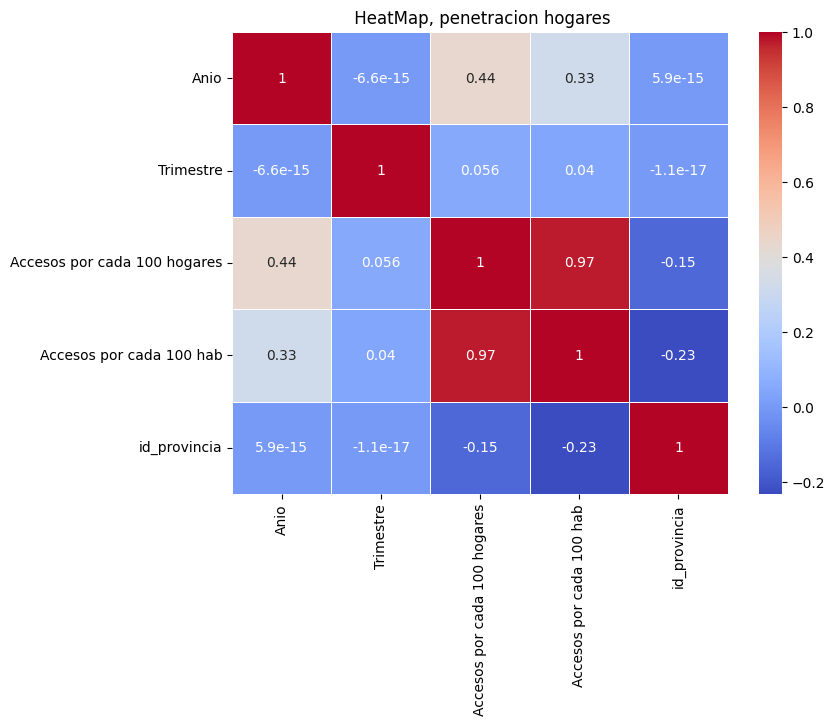

In [10]:
plt.figure(figsize = (8, 6))
sns.heatmap(dfPenetracionHogares.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title(' HeatMap, penetracion hogares')

Se puede ver en el mapa de calor una alta relación entre los accesos *cada 100 hogares* y *cada 100 habitantes*. Se determina entonces que el tamaño del hogar no es importante y no tiene un impacto significativo, ya que el acceso por hogar está relacionado con el acceso por habitantes. 

Por causa de esta relación, solo nos enfocaremos para el análisis en el acceso por cada 100 habitantes.

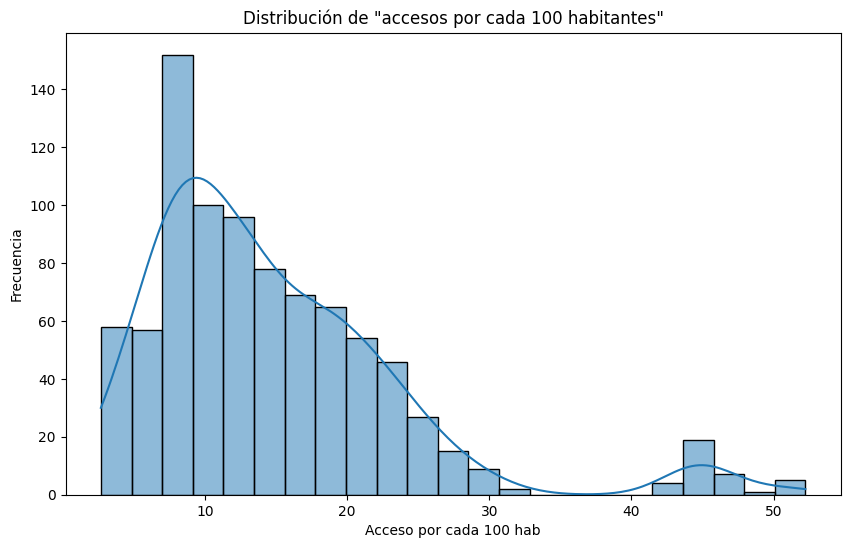

In [11]:
plt.figure(figsize=(10, 6))
sns.histplot(dfPenetracionHogares['Accesos por cada 100 hab'], kde=True)
plt.xlabel('Acceso por cada 100 hab')
plt.ylabel('Frecuencia')
plt.title('Distribución de "accesos por cada 100 habitantes"')
plt.show()

Se observa en la distribución una gran cantidad de habitantes que tienen menor acceso a servicios de internet fijo y un grupo aislado donde este acceso aumenta.

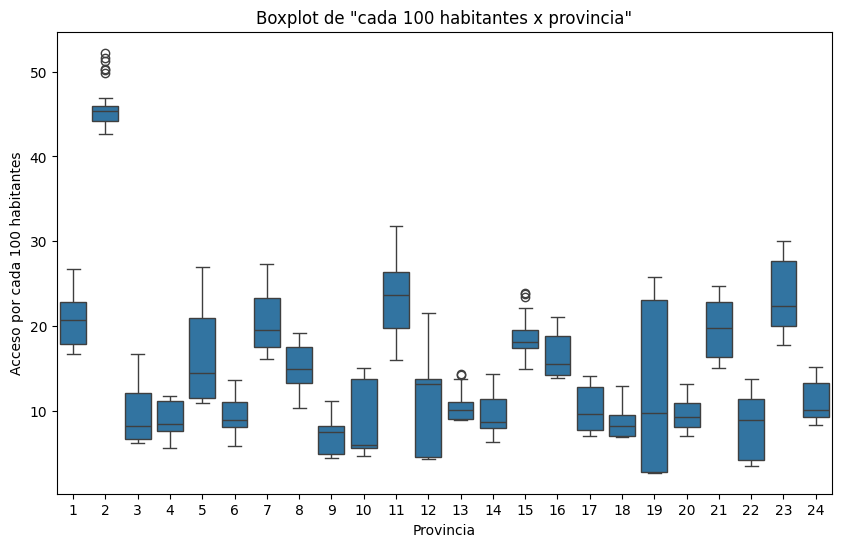

In [12]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='id_provincia', y='Accesos por cada 100 hab', data=dfPenetracionHogares)
plt.xlabel('Provincia')
plt.ylabel('Acceso por cada 100 habitantes')
plt.title('Boxplot de "cada 100 habitantes x provincia"')
plt.show()

Sumando las provincias a nuestro análisis, notamos que el grupo que posee mayores valores proviene de una provincia en particular. Las demás, varían un poco pero siempre dentro del mismo rango.

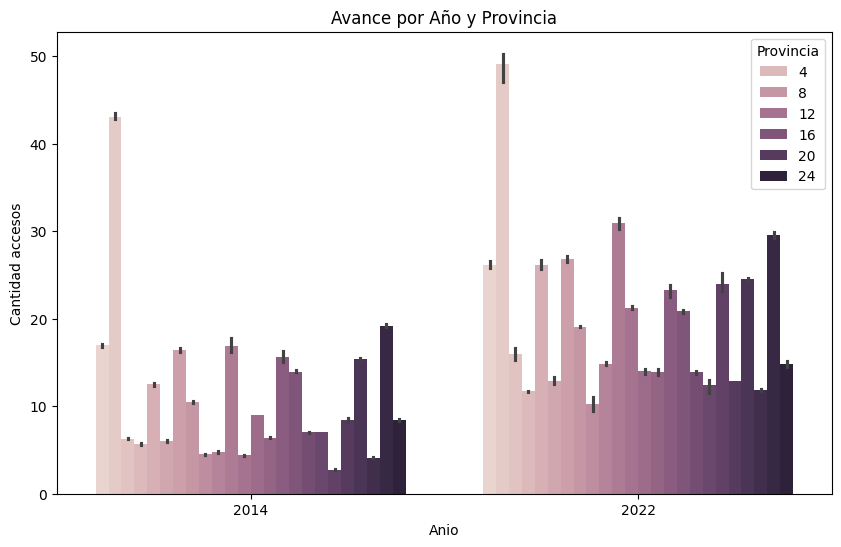

In [13]:
plt.figure(figsize=(10, 6))
sns.barplot(x="Anio", y="Accesos por cada 100 hab", hue="id_provincia", data=dfPenetracionHogares[(dfPenetracionHogares['Anio'] == 2014) | (dfPenetracionHogares['Anio'] == 2022)])
plt.title("Avance por Año y Provincia")
plt.xlabel("Anio")
plt.ylabel("Cantidad accesos")
plt.legend(title="Provincia")
plt.show()

Si llevamos la comparación al primer y ultimo año del dataset, podemos observar nuevamente la diferencia entre la provincia “2” y las demás, sin embargo, si evaluamos el avance en porcentajes es la que menos ha crecido.

### BANDA ANCHA FIJA

In [14]:
dfBandaAnchaFija = pd.read_excel('datos/Internet_BAF.xlsx',sheet_name='Dial-BAf')

In [15]:
dfBandaAnchaFija.head()

,Año,Trimestre,Provincia,Banda ancha fija,Dial up,Total
0,2022,4,Buenos Aires,4788466,6199.0,4794665
1,2022,4,Capital Federal,1549781,2145.0,1551926
2,2022,4,Catamarca,70908,1.0,70909
3,2022,4,Chaco,143658,5.0,143663
4,2022,4,Chubut,167855,904.0,168759


In [16]:
dfBandaAnchaFija['Provincia'] = dfBandaAnchaFija['Provincia'].apply(lambda x: unidecode(x))         # Quitamos los signos ortográficos.
dfBandaAnchaFija['id_provincia'] =  dfBandaAnchaFija['Provincia'].map(dfProvincias.set_index('Provincia')['id'])         # Agrego el campo id_pronvincia, relacionado al dataframe creado anteriormente.
dfBandaAnchaFija =  dfBandaAnchaFija.drop('Provincia', axis = 1)            # Elimino la columnas provincia.
dfBandaAnchaFija = dfBandaAnchaFija.rename (columns = {'Año' : 'Anio'})         # Cambiamos el nombre de la columna por si pudiera traer problemas.

In [17]:
dfBandaAnchaFija.head()

,Anio,Trimestre,Banda ancha fija,Dial up,Total,id_provincia
0,2022,4,4788466,6199.0,4794665,1
1,2022,4,1549781,2145.0,1551926,2
2,2022,4,70908,1.0,70909,3
3,2022,4,143658,5.0,143663,4
4,2022,4,167855,904.0,168759,5


In [18]:
print( dfBandaAnchaFija.shape)
print('-----------------------------------------------')
print( dfBandaAnchaFija.dtypes)
print('-----------------------------------------------')
print('-----NULOS-------------------------------------')
print( dfBandaAnchaFija.isnull().sum())

(864, 6)
-----------------------------------------------
Anio                  int64
Trimestre             int64
Banda ancha fija      int64
Dial up             float64
Total                 int64
id_provincia          int64
dtype: object
-----------------------------------------------
-----NULOS-------------------------------------
Anio                0
Trimestre           0
Banda ancha fija    0
Dial up             2
Total               0
id_provincia        0
dtype: int64


In [19]:
dfBandaAnchaFija.describe()

,Anio,Trimestre,Banda ancha fija,Dial up,Total,id_provincia
count,864.000000,864.000000,8.640000e+02,862.000000,8.640000e+02,864.000000
mean,2018.000000,2.500000,3.481485e+05,963.879350,3.491101e+05,12.500000
std,2.583484,1.118682,7.476219e+05,2397.370177,7.494854e+05,6.926196
min,2014.000000,1.000000,1.219300e+04,0.000000,1.255700e+04,1.000000
25%,2016.000000,1.750000,5.221525e+04,9.000000,5.232900e+04,6.750000
50%,2018.000000,2.500000,1.044120e+05,148.000000,1.045965e+05,12.500000
75%,2020.000000,3.250000,1.791568e+05,619.000000,1.801745e+05,18.250000
max,2022.000000,4.000000,4.788466e+06,15229.000000,4.794665e+06,24.000000


Text(0.5, 1.0, ' HeatMap, BAF')

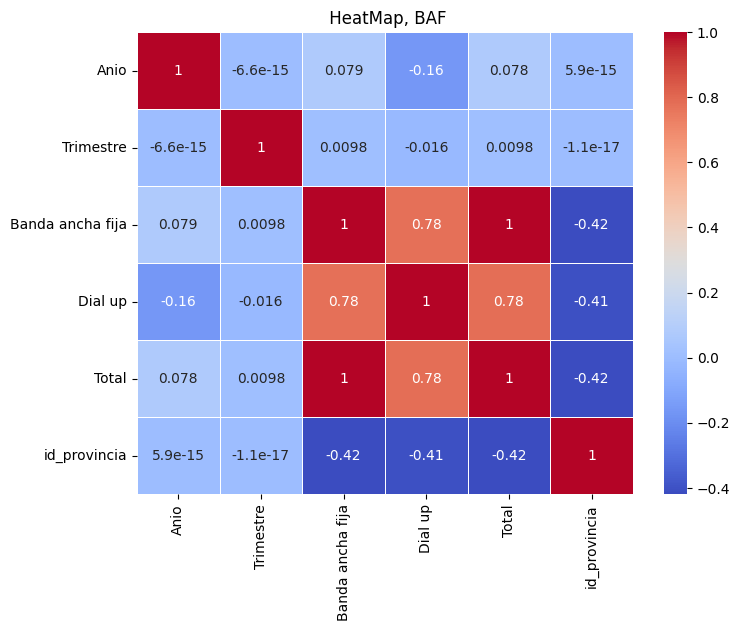

In [20]:
plt.figure(figsize = (8, 6))
sns.heatmap( dfBandaAnchaFija.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title(' HeatMap, BAF')

Notamos en el HeatMap correlación tan alta entre la banca ancha y el total de conexiones, que sugiere que el dial up no llega a tener números significativos.
También tenemos relación entre la banda ancha y el dial up, la analizaremos más abajo.

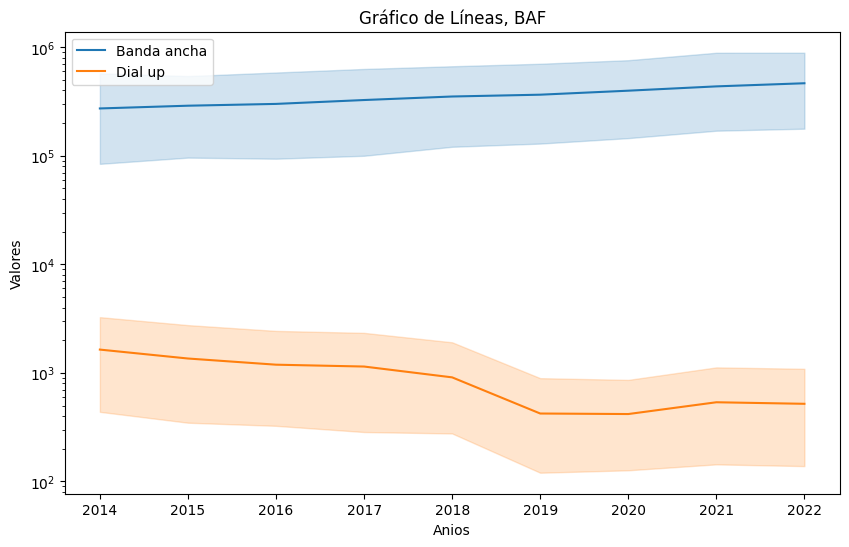

In [21]:
plt.figure(figsize=(10, 6))
sns.lineplot(x="Anio", y="Banda ancha fija", data = dfBandaAnchaFija[(dfBandaAnchaFija['Trimestre'] == 4)], label="Banda ancha")
sns.lineplot(x="Anio", y="Dial up", data = dfBandaAnchaFija[(dfBandaAnchaFija['Trimestre'] == 4)], label="Dial up")

plt.yscale("log")           # Por la diferencia numérica entre las variables, se toma una escala logarítmica para poder observarlos en un mismo gráfico.

plt.title("Gráfico de Líneas, BAF")
plt.xlabel("Anios")
plt.ylabel("Valores")
plt.legend()

plt.show()

Podemos notar que están relacionadas, mientras las conexiones de banda ancha aumentan constantemente, las de dial up disminuyen significativamente. Se puede asumir que son traspasos o actualizaciones de los servicios.

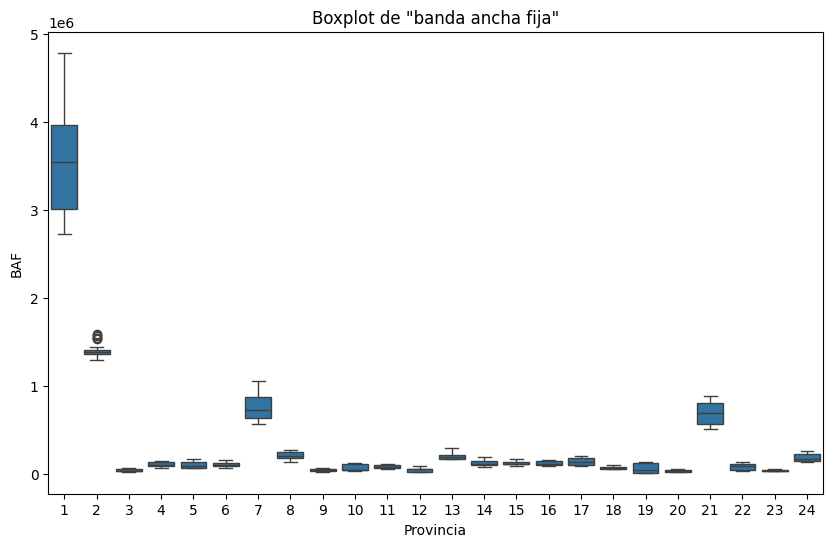

In [22]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='id_provincia', y='Banda ancha fija', data= dfBandaAnchaFija)
plt.xlabel('Provincia')
plt.ylabel('BAF')
plt.title('Boxplot de "banda ancha fija"')
plt.show()

Podemos ver que provincias son las que poseen mayor cantidad de conexiones, esto puede estar relacionado a la cantidad de habitantes de cada centro urbano.

### ACCESO POR TECNOLOGIA

In [23]:
dfAccesoPorTecnologia = pd.read_excel('datos/Internet_Accesos-por-tecnologia.xlsx',sheet_name='Accesos Por Tecnología')

In [24]:
dfAccesoPorTecnologia.head()

,Año,Trimestre,Provincia,ADSL,Cablemodem,Fibra óptica,Wireless,Otros,Total,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17
0,2022,4,Buenos Aires,325908.0,2767247.0,1499149.0,129910.0,72451.0,4794665.0,NaN,NaN,Buenos Aires,325908.0,2767247.0,1499149.0,129910.0,72451.0,4794665.0
1,2022,4,Capital Federal,138753.0,1238196.0,138548.0,4603.0,31826.0,1551926.0,NaN,NaN,Capital Federal,138753.0,1238196.0,138548.0,4603.0,31826.0,1551926.0
2,2022,4,Catamarca,8952.0,10998.0,47337.0,1379.0,2243.0,70909.0,NaN,NaN,Catamarca,8952.0,10998.0,47337.0,1379.0,2243.0,70909.0
3,2022,4,Chaco,24582.0,61265.0,47285.0,7957.0,2574.0,143663.0,NaN,NaN,Chaco,24582.0,61265.0,47285.0,7957.0,2574.0,143663.0
4,2022,4,Chubut,45450.0,73923.0,9815.0,30721.0,8850.0,168759.0,NaN,NaN,Chubut,45450.0,73923.0,9815.0,30721.0,8850.0,168759.0


In [25]:
dfAccesoPorTecnologia = dfAccesoPorTecnologia.drop(['Unnamed: 9', 'Unnamed: 10', 'Unnamed: 11', 
                                                        'Unnamed: 12', 'Unnamed: 13', 'Unnamed: 14', 
                                                        'Unnamed: 15', 'Unnamed: 16', 'Unnamed: 17'], axis = 1)         # Eliminamos columnas que no poseen informacion relevante.

In [26]:
dfAccesoPorTecnologia.tail()

,Año,Trimestre,Provincia,ADSL,Cablemodem,Fibra óptica,Wireless,Otros,Total
861,2014,1,Santiago Del Estero,32567.0,3598.0,19.0,915.0,34.0,37133.0
862,2014,1,Tierra Del Fuego,21618.0,2837.0,648.0,1.0,2934.0,28038.0
863,2014,1,Tucumán,129717.0,83.0,121.0,13.0,98.0,130032.0
864,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
865,*,Los datos provinciales no coinciden a nivel na...,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [27]:
dfAccesoPorTecnologia = dfAccesoPorTecnologia.drop([864, 865], axis = 0)         # Eliminamos 2 filas que traian una aclaracion del excel.

# Los campos Anio y Trimestre contienen algunos datos con * por la aclaracion que eliminamos anteriormente. Quitamos esos caracteres de la siguiente forma.
dfAccesoPorTecnologia["Año"] = dfAccesoPorTecnologia["Año"].astype(str)  # Convierte los valores a str.
dfAccesoPorTecnologia["Año"] = dfAccesoPorTecnologia["Año"].str.replace('\*', '', regex=True)  # Reemplazamos los asteriscos.
dfAccesoPorTecnologia["Año"] = dfAccesoPorTecnologia["Año"].astype(int)  # Convertimos los valores nuevamente a enteros.

dfAccesoPorTecnologia["Trimestre"] = dfAccesoPorTecnologia["Trimestre"].astype(str)  # Convierte los valores a str.
dfAccesoPorTecnologia["Trimestre"] = dfAccesoPorTecnologia["Trimestre"].str.replace('\*', '', regex=True)  # Reemplazamos los asteriscos.
dfAccesoPorTecnologia["Trimestre"] = dfAccesoPorTecnologia["Trimestre"].astype(int)  # Convertimos los valores nuevamente a enteros.

In [28]:
dfAccesoPorTecnologia['Provincia'] = dfAccesoPorTecnologia['Provincia'].apply(lambda x: unidecode(x))         # Quitamos los signos ortográficos.
dfAccesoPorTecnologia['id_provincia'] =  dfAccesoPorTecnologia['Provincia'].map(dfProvincias.set_index('Provincia')['id'])        # Agrego el campo id_pronvincia, relacionado al dataframe creado anteriormente.
dfAccesoPorTecnologia["id_provincia"] = dfAccesoPorTecnologia["id_provincia"].astype(int)  # Convertimos los id de provincia a enteros.
dfAccesoPorTecnologia =  dfAccesoPorTecnologia.drop('Provincia', axis = 1)            # Elimino la columnas provincia.
dfAccesoPorTecnologia = dfAccesoPorTecnologia.rename (columns = {'Año' : 'Anio'})         # Cambiamos el nombre de la columna por si pudiera traer problemas.

In [29]:
dfAccesoPorTecnologia.head()

,Anio,Trimestre,ADSL,Cablemodem,Fibra óptica,Wireless,Otros,Total,id_provincia
0,2022,4,325908.0,2767247.0,1499149.0,129910.0,72451.0,4794665.0,1
1,2022,4,138753.0,1238196.0,138548.0,4603.0,31826.0,1551926.0,2
2,2022,4,8952.0,10998.0,47337.0,1379.0,2243.0,70909.0,3
3,2022,4,24582.0,61265.0,47285.0,7957.0,2574.0,143663.0,4
4,2022,4,45450.0,73923.0,9815.0,30721.0,8850.0,168759.0,5


In [30]:
print( dfAccesoPorTecnologia.shape)
print('-----------------------------------------------')
print( dfAccesoPorTecnologia.dtypes)
print('-----------------------------------------------')
print('-----NULOS-------------------------------------')
print( dfAccesoPorTecnologia.isnull().sum())

(864, 9)
-----------------------------------------------
Anio              int32
Trimestre         int32
ADSL            float64
Cablemodem      float64
Fibra óptica    float64
Wireless        float64
Otros           float64
Total           float64
id_provincia      int32
dtype: object
-----------------------------------------------
-----NULOS-------------------------------------
Anio            0
Trimestre       0
ADSL            0
Cablemodem      0
Fibra óptica    0
Wireless        0
Otros           0
Total           0
id_provincia    0
dtype: int64


In [31]:
dfAccesoPorTecnologia.describe()

,Anio,Trimestre,ADSL,Cablemodem,Fibra óptica,Wireless,Otros,Total,id_provincia
count,864.000000,864.000000,8.640000e+02,8.640000e+02,8.640000e+02,864.000000,864.000000,8.640000e+02,864.000000
mean,2018.000000,2.500000,1.255457e+05,1.739913e+05,3.262331e+04,10720.798611,6228.967593,3.491101e+05,12.500000
std,2.583484,1.118682,2.520514e+05,4.276313e+05,1.325430e+05,18723.092796,10740.931282,7.494854e+05,6.926196
min,2014.000000,1.000000,6.120000e+03,0.000000e+00,0.000000e+00,0.000000,2.000000,1.255700e+04,1.000000
25%,2016.000000,1.750000,2.232025e+04,8.912500e+03,2.052500e+02,261.000000,313.000000,5.232900e+04,6.750000
50%,2018.000000,2.500000,4.816100e+04,3.498400e+04,1.233000e+03,4377.000000,1862.500000,1.045965e+05,12.500000
75%,2020.000000,3.250000,1.025470e+05,7.168325e+04,1.564250e+04,12673.750000,7128.000000,1.801745e+05,18.250000
max,2022.000000,4.000000,1.586343e+06,2.767247e+06,1.499149e+06,129910.000000,73415.000000,4.794665e+06,24.000000


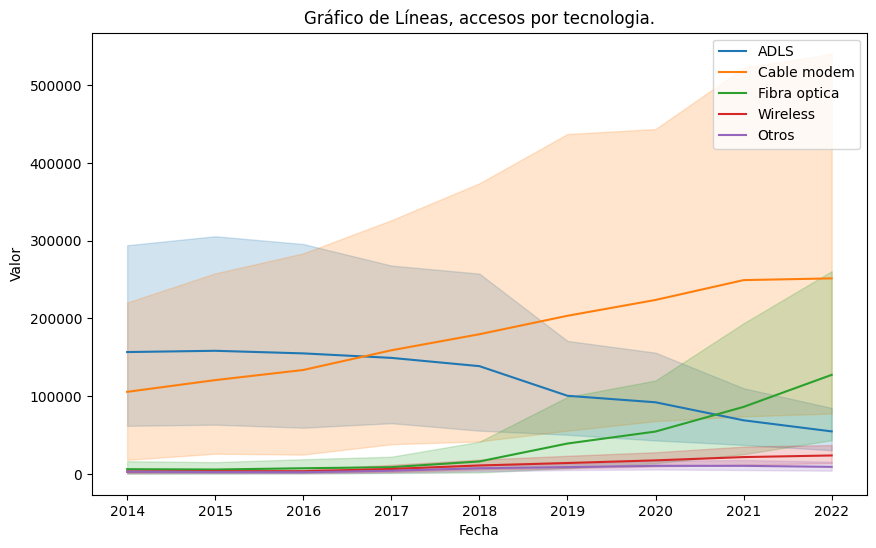

In [32]:
plt.figure(figsize=(10, 6))
sns.lineplot(x="Anio", y="ADSL", data=dfAccesoPorTecnologia[(dfAccesoPorTecnologia['Trimestre'] == 4)], label="ADLS")
sns.lineplot(x="Anio", y="Cablemodem", data=dfAccesoPorTecnologia[(dfAccesoPorTecnologia['Trimestre'] == 4)], label="Cable modem")
sns.lineplot(x="Anio", y="Fibra óptica", data=dfAccesoPorTecnologia[(dfAccesoPorTecnologia['Trimestre'] == 4)], label="Fibra optica")
sns.lineplot(x="Anio", y="Wireless", data=dfAccesoPorTecnologia[(dfAccesoPorTecnologia['Trimestre'] == 4)], label="Wireless")
sns.lineplot(x="Anio", y="Otros", data=dfAccesoPorTecnologia[(dfAccesoPorTecnologia['Trimestre'] == 4)], label="Otros")

plt.title("Gráfico de Líneas, accesos por tecnologia.")
plt.xlabel("Fecha")
plt.ylabel("Valor")
plt.legend()

plt.show()

Como mencionamos anteriormente, se observa un avance notable de la fibra óptica y cable modem (ambas tecnologías de banda ancha) sobre lo que son las antiguas conexiones ADLS, las cuales van disminuyendo.

In [33]:
dfAccesoPorTecnologia_tot = dfAccesoPorTecnologia.groupby(['Anio', 'Trimestre']).sum().reset_index()            # Creo un nuevo dataframe con resultados agrupados.
dfAccesoPorTecnologia_tot = dfAccesoPorTecnologia_tot.drop('id_provincia', axis = 1)            # Elimino la columna provincia.

### HISTORICOS DE VELOCIDAD

In [34]:
dfHistoricoVelocidad = pd.read_excel('datos/historico_velocidad_internet.xlsx',sheet_name='Velocidad % por prov')

In [35]:
dfHistoricoVelocidad.head()

,Año,Trimestre,Provincia,Mbps (Media de bajada)
0,2022,4,Buenos Aires,111.00
1,2022,4,Capital Federal,182.86
2,2022,4,Catamarca,83.33
3,2022,4,Chaco,104.02
4,2022,4,Chubut,15.92


In [36]:
dfHistoricoVelocidad['Provincia'] = dfHistoricoVelocidad['Provincia'].apply(lambda x: unidecode(x))         # Quitamos los signos ortográficos.
dfHistoricoVelocidad['id_provincia'] =  dfHistoricoVelocidad['Provincia'].map(dfProvincias.set_index('Provincia')['id'])         # Agrego el campo id_pronvincia, relacionado al dataframe creado anteriormente.
dfHistoricoVelocidad =  dfHistoricoVelocidad.drop('Provincia', axis = 1)            # Elimino la columnas provincia.
dfHistoricoVelocidad = dfHistoricoVelocidad.rename (columns = {'Año' : 'Anio'})         # Cambiamos el nombre de la columna por si pudiera traer problemas.

In [37]:
dfHistoricoVelocidad.head()

,Anio,Trimestre,Mbps (Media de bajada),id_provincia
0,2022,4,111.00,1
1,2022,4,182.86,2
2,2022,4,83.33,3
3,2022,4,104.02,4
4,2022,4,15.92,5


In [38]:
print( dfHistoricoVelocidad.shape)
print('-----------------------------------------------')
print( dfHistoricoVelocidad.dtypes)
print('-----------------------------------------------')
print('-----NULOS-------------------------------------')
print( dfHistoricoVelocidad.isnull().sum())

(864, 4)
-----------------------------------------------
Anio                        int64
Trimestre                   int64
Mbps (Media de bajada)    float64
id_provincia                int64
dtype: object
-----------------------------------------------
-----NULOS-------------------------------------
Anio                      0
Trimestre                 0
Mbps (Media de bajada)    0
id_provincia              0
dtype: int64


In [39]:
dfHistoricoVelocidad.describe()

,Anio,Trimestre,Mbps (Media de bajada),id_provincia
count,864.000000,864.000000,864.000000,864.000000
mean,2018.000000,2.500000,15.375182,12.500000
std,2.583484,1.118682,18.320956,6.926196
min,2014.000000,1.000000,2.573729,1.000000
25%,2016.000000,1.750000,4.316775,6.750000
50%,2018.000000,2.500000,7.416094,12.500000
75%,2020.000000,3.250000,19.709719,18.250000
max,2022.000000,4.000000,182.860000,24.000000


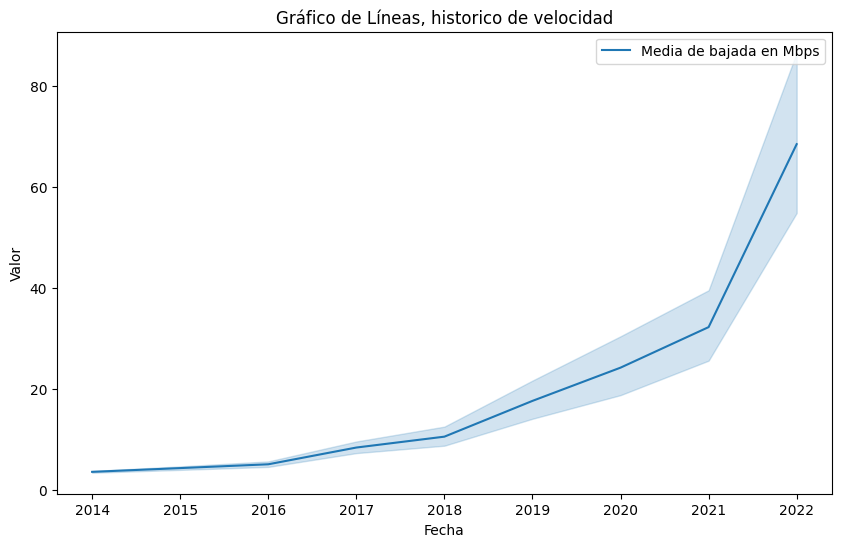

In [40]:
plt.figure(figsize=(10, 6))
sns.lineplot(x="Anio", y="Mbps (Media de bajada)", data=dfHistoricoVelocidad[(dfHistoricoVelocidad['Trimestre'] == 4)], label="Media de bajada en Mbps")

plt.title("Gráfico de Líneas, historico de velocidad")
plt.xlabel("Fecha")
plt.ylabel("Valor")
plt.legend()

plt.show()

Observamos un crecimiento de velocidad, que acompaña lo que venimos viendo en los gráficos anteriores. Se ve un claro quiebre en 2017 donde, según el “gráfico de líneas, accesos por tecnología”, vemos que la banda ancha destrona en cantidad de usuarios al ADLS. El aumento de velocidad, está altamente relacionado a las tecnologias utilizadas.

### ACCESOS POR VELOCIDAD

In [41]:
dfAccesosPorVelocidad = pd.read_excel('datos/internet_Accesos-por-velocidad.xlsx',sheet_name='Accesos por velocidad')

In [42]:
dfAccesosPorVelocidad.head()

,Año,Trimestre,Provincia,HASTA 512 kbps,+ 512 Kbps - 1 Mbps,+ 1 Mbps - 6 Mbps,+ 6 Mbps - 10 Mbps,+ 10 Mbps - 20 Mbps,+ 20 Mbps - 30 Mbps,+ 30 Mbps,OTROS,Total
0,2022,4,Buenos Aires,28934.0,23347.0,259866.0,281550.0,244555.0,98670.0,3760109.0,97634.0,4794665.0
1,2022,4,Capital Federal,516.0,5096.0,31320.0,64653.0,36336.0,8116.0,1299117.0,106772.0,1551926.0
2,2022,4,Catamarca,71.0,315.0,2716.0,5028.0,4638.0,3122.0,52739.0,2280.0,70909.0
3,2022,4,Chaco,461.0,771.0,16067.0,17846.0,6704.0,3039.0,94866.0,3909.0,143663.0
4,2022,4,Chubut,109.0,1614.0,46457.0,31007.0,34728.0,15770.0,19048.0,20026.0,168759.0


In [43]:
dfAccesosPorVelocidad['Provincia'] = dfAccesosPorVelocidad['Provincia'].apply(lambda x: unidecode(x))         # Quitamos los signos ortográficos.
dfAccesosPorVelocidad['id_provincia'] =  dfAccesosPorVelocidad['Provincia'].map(dfProvincias.set_index('Provincia')['id'])         # Agrego el campo id_pronvincia, relacionado al dataframe creado anteriormente.
dfAccesosPorVelocidad =  dfAccesosPorVelocidad.drop('Provincia', axis = 1)            # Elimino la columnas provincia.
dfAccesosPorVelocidad = dfAccesosPorVelocidad.rename (columns = {'Año' : 'Anio'})         # Cambiamos el nombre de la columna por si pudiera traer problemas.

In [44]:
dfAccesosPorVelocidad.head()

,Anio,Trimestre,HASTA 512 kbps,+ 512 Kbps - 1 Mbps,+ 1 Mbps - 6 Mbps,+ 6 Mbps - 10 Mbps,+ 10 Mbps - 20 Mbps,+ 20 Mbps - 30 Mbps,+ 30 Mbps,OTROS,Total,id_provincia
0,2022,4,28934.0,23347.0,259866.0,281550.0,244555.0,98670.0,3760109.0,97634.0,4794665.0,1
1,2022,4,516.0,5096.0,31320.0,64653.0,36336.0,8116.0,1299117.0,106772.0,1551926.0,2
2,2022,4,71.0,315.0,2716.0,5028.0,4638.0,3122.0,52739.0,2280.0,70909.0,3
3,2022,4,461.0,771.0,16067.0,17846.0,6704.0,3039.0,94866.0,3909.0,143663.0,4
4,2022,4,109.0,1614.0,46457.0,31007.0,34728.0,15770.0,19048.0,20026.0,168759.0,5


In [45]:
print( dfAccesosPorVelocidad.shape)
print('-----------------------------------------------')
print( dfAccesosPorVelocidad.dtypes)
print('-----------------------------------------------')
print('-----NULOS-------------------------------------')
print( dfAccesosPorVelocidad.isnull().sum())

(864, 12)
-----------------------------------------------
Anio                     int64
Trimestre                int64
HASTA 512 kbps         float64
+ 512 Kbps - 1 Mbps    float64
+ 1 Mbps - 6 Mbps      float64
+ 6 Mbps - 10 Mbps     float64
+ 10 Mbps - 20 Mbps    float64
+ 20 Mbps - 30 Mbps    float64
+ 30 Mbps              float64
OTROS                  float64
Total                  float64
id_provincia             int64
dtype: object
-----------------------------------------------
-----NULOS-------------------------------------
Anio                   0
Trimestre              0
HASTA 512 kbps         0
+ 512 Kbps - 1 Mbps    0
+ 1 Mbps - 6 Mbps      0
+ 6 Mbps - 10 Mbps     0
+ 10 Mbps - 20 Mbps    0
+ 20 Mbps - 30 Mbps    0
+ 30 Mbps              0
OTROS                  6
Total                  0
id_provincia           0
dtype: int64


In [46]:
dfAccesosPorVelocidad.describe()

,Anio,Trimestre,HASTA 512 kbps,+ 512 Kbps - 1 Mbps,+ 1 Mbps - 6 Mbps,+ 6 Mbps - 10 Mbps,+ 10 Mbps - 20 Mbps,+ 20 Mbps - 30 Mbps,+ 30 Mbps,OTROS,Total,id_provincia
count,864.000000,864.000000,864.000000,864.000000,8.640000e+02,864.000000,864.000000,864.000000,8.640000e+02,858.00000,8.640000e+02,864.000000
mean,2018.000000,2.500000,2065.484954,9960.253472,1.480209e+05,37641.817130,38114.030093,20793.402778,8.555756e+04,5289.20979,3.474059e+05,12.500000
std,2.583484,1.118682,13459.419708,21992.818620,3.438435e+05,65383.130836,93024.185664,73859.534388,3.635417e+05,13011.53175,7.450600e+05,6.926196
min,2014.000000,1.000000,6.000000,0.000000,2.531000e+03,0.000000,0.000000,0.000000,0.000000e+00,-1945.00000,1.240600e+04,1.000000
25%,2016.000000,1.750000,39.000000,312.000000,2.744150e+04,2929.000000,1579.750000,25.750000,8.000000e+00,0.00000,5.274050e+04,6.750000
50%,2018.000000,2.500000,109.000000,2536.000000,4.783750e+04,11247.000000,9067.000000,1146.000000,1.019000e+03,0.00000,1.052355e+05,12.500000
75%,2020.000000,3.250000,541.250000,8056.250000,8.639200e+04,38753.250000,26408.000000,9567.500000,2.247475e+04,5146.00000,1.791482e+05,18.250000
max,2022.000000,4.000000,238920.000000,171244.480000,2.299705e+06,403575.000000,886678.000000,949093.000000,3.760109e+06,120464.00000,4.794665e+06,24.000000


Text(0.5, 1.0, ' HeatMap, acceso por velocidad')

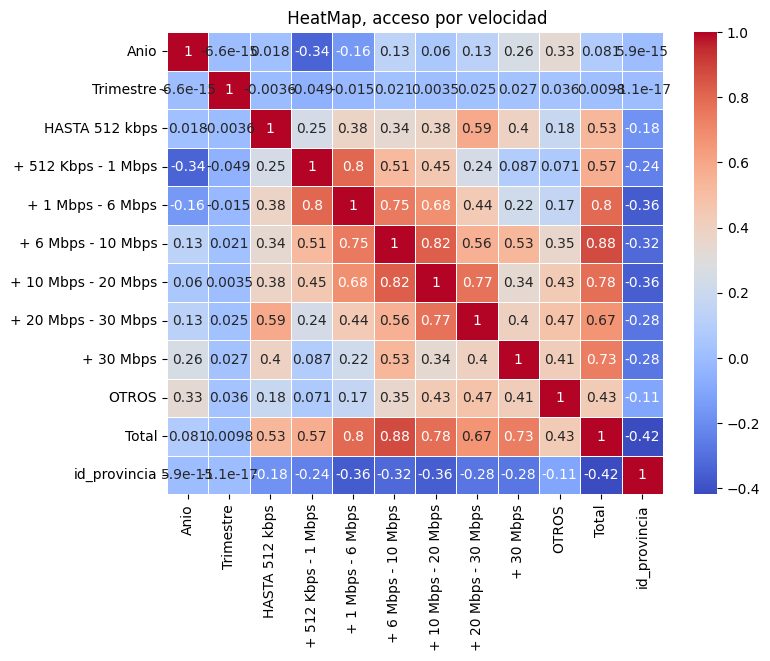

In [47]:
plt.figure(figsize = (8, 6))
sns.heatmap( dfAccesosPorVelocidad.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title(' HeatMap, acceso por velocidad')

### ACCESOS POR VELOCIDAD, SIN RANGOS
Por la cantidad de datos se vuelve muy complicado analizar correctamente este archivo, veremos sí hace falta para alguna métrica o si puedo trabajar directamente con el agrupado.

In [48]:
dfAccesosPorVelocidadAbierto = pd.read_excel('datos/internet_Accesos-por-velocidad_provincia_sin rangos.xlsx',sheet_name='Velocidad_sin_Rangos')

In [49]:
dfAccesosPorVelocidadAbierto.head()

,Año,Trimestre,Provincia,Otros,"0,256 Mbps","0,375 Mbps","0,625 Mbps","0,5 Mbps","0,512 Mbps","0,75 Mbps",...,2048 Mbps,2529 Mbps,3072 Mbps,4000 Mbps,5000 Mbps,5125 Mbps,6000 Mbps,7000 Mbps,8000 Mbps,10000 Mbps
0,2022.0,4.0,Buenos Aires,97634.0,18.0,0.0,0.0,28724.0,192.0,4611.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2022.0,4.0,Capital Federal,106772.0,31.0,0.0,0.0,451.0,34.0,1307.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2022.0,4.0,Catamarca,2280.0,0.0,0.0,0.0,34.0,37.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2022.0,4.0,Chaco,3909.0,0.0,225.0,111.0,234.0,2.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2022.0,4.0,Chubut,20026.0,8.0,0.0,0.0,69.0,32.0,836.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [50]:
dfAccesosPorVelocidadAbierto['id_provincia'] =  dfAccesosPorVelocidadAbierto['Provincia'].map(dfProvincias.set_index('Provincia')['id'])         # Agrego el campo id_pronvincia, relacionado al dataframe creado anteriormente.
dfAccesosPorVelocidadAbierto =  dfAccesosPorVelocidadAbierto.drop('Provincia', axis = 1)            # Elimino la columnas provincia.
dfAccesosPorVelocidadAbierto = dfAccesosPorVelocidadAbierto.rename (columns = {'Año' : 'Anio'})         # Cambiamos el nombre de la columna por si pudiera traer problemas.

In [51]:
dfAccesosPorVelocidadAbierto.head()

,Anio,Trimestre,Otros,"0,256 Mbps","0,375 Mbps","0,625 Mbps","0,5 Mbps","0,512 Mbps","0,75 Mbps",1 Mbps,...,2529 Mbps,3072 Mbps,4000 Mbps,5000 Mbps,5125 Mbps,6000 Mbps,7000 Mbps,8000 Mbps,10000 Mbps,id_provincia
0,2022.0,4.0,97634.0,18.0,0.0,0.0,28724.0,192.0,4611.0,18736.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,2022.0,4.0,106772.0,31.0,0.0,0.0,451.0,34.0,1307.0,3789.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0
2,2022.0,4.0,2280.0,0.0,0.0,0.0,34.0,37.0,0.0,315.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0
3,2022.0,4.0,3909.0,0.0,225.0,111.0,234.0,2.0,0.0,660.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0
4,2022.0,4.0,20026.0,8.0,0.0,0.0,69.0,32.0,836.0,778.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0


In [52]:
print( dfAccesosPorVelocidadAbierto.shape)
print('-----------------------------------------------')
print( dfAccesosPorVelocidadAbierto.dtypes)
print('-----------------------------------------------')
print('-----NULOS-------------------------------------')
print( dfAccesosPorVelocidadAbierto.isnull().sum())

(505, 186)
-----------------------------------------------
Anio            float64
Trimestre       float64
Otros           float64
0,256 Mbps      float64
0,375 Mbps      float64
                 ...   
6000 Mbps       float64
7000 Mbps       float64
8000 Mbps       float64
10000 Mbps      float64
id_provincia    float64
Length: 186, dtype: object
-----------------------------------------------
-----NULOS-------------------------------------
Anio              1
Trimestre         1
Otros             1
0,256 Mbps        1
0,375 Mbps        1
               ... 
6000 Mbps         1
7000 Mbps         1
8000 Mbps         1
10000 Mbps        1
id_provincia    106
Length: 186, dtype: int64


In [53]:
dfAccesosPorVelocidadAbierto.describe()

,Anio,Trimestre,Otros,"0,256 Mbps","0,375 Mbps","0,625 Mbps","0,5 Mbps","0,512 Mbps","0,75 Mbps",1 Mbps,...,2529 Mbps,3072 Mbps,4000 Mbps,5000 Mbps,5125 Mbps,6000 Mbps,7000 Mbps,8000 Mbps,10000 Mbps,id_provincia
count,504.000000,504.000000,504.000000,504.000000,504.000000,504.000000,504.000000,504.000000,504.000000,504.000000,...,504.000000,504.000000,504.000000,504.000000,504.000000,504.000000,504.000000,504.000000,504.000000,399.000000
mean,2019.857143,2.571429,9132.545635,3.240079,5.357143,2.642857,2491.728175,39.031746,1312.303571,5230.615079,...,0.039683,2.251984,0.134921,0.073413,0.007937,0.067460,0.196429,0.015873,0.031746,12.105263
std,1.522341,1.138019,16245.555828,11.108175,34.336532,16.939356,17503.933621,74.020006,5171.437899,7845.964066,...,0.890871,22.519662,1.342696,0.800452,0.088821,0.672827,1.602405,0.177642,0.355284,7.064238
min,2017.000000,1.000000,0.000000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2019.000000,2.000000,537.750000,0.000000,0.000000,0.000000,20.750000,0.000000,0.000000,902.250000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000
50%,2020.000000,3.000000,3987.000000,0.000000,0.000000,0.000000,47.000000,10.500000,1.000000,2364.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,12.000000
75%,2021.000000,4.000000,11535.250000,0.250000,0.000000,0.000000,82.250000,57.000000,313.000000,5760.250000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,19.000000
max,2022.000000,4.000000,120987.000000,102.000000,225.000000,111.000000,238902.000000,609.000000,35185.000000,49473.000000,...,20.000000,227.000000,15.000000,9.000000,1.000000,8.000000,18.000000,2.000000,4.000000,23.000000


### INGRESOS (DINERO)

In [54]:
dfIngresos = pd.read_excel('datos/internet_Ingresos.xlsx',sheet_name='Ingresos')

In [55]:
dfIngresos.head()

,Año,Trimestre,Ingresos (miles de pesos),Periodo
0,2022,4,7.244348e+07,Oct-Dic 2022
1,2022,3,6.408678e+07,Jul-Sept 2022
2,2022,2,6.041950e+07,Abr-Jun 2022
3,2022,1,5.521931e+07,Ene-Mar 2022
4,2021,4,4.546789e+07,Oct-Dic 2021


In [56]:
dfIngresos = dfIngresos.drop('Periodo', axis = 1)           # Teniendo el anio y el trimestre, el periodo no es de ayuda para el analisis.
dfIngresos = dfIngresos.rename (columns = {'Año' : 'Anio'})         # Cambiamos el nombre de la columna por si pudiera traer problemas.
dfIngresos['Ingresos (miles de pesos)'] = dfIngresos['Ingresos (miles de pesos)'].round(2)        # Redondeamos el nro a 2 decimales para una mejor visualizacion.

In [57]:
dfIngresos.head()

,Anio,Trimestre,Ingresos (miles de pesos)
0,2022,4,72443482.99
1,2022,3,64086784.33
2,2022,2,60419500.62
3,2022,1,55219313.01
4,2021,4,45467887.17


In [58]:
print( dfIngresos.shape)
print('-----------------------------------------------')
print( dfIngresos.dtypes)
print('-----------------------------------------------')
print('-----NULOS-------------------------------------')
print( dfIngresos.isnull().sum())

(36, 3)
-----------------------------------------------
Anio                           int64
Trimestre                      int64
Ingresos (miles de pesos)    float64
dtype: object
-----------------------------------------------
-----NULOS-------------------------------------
Anio                         0
Trimestre                    0
Ingresos (miles de pesos)    0
dtype: int64


In [59]:
dfIngresos.describe()

,Anio,Trimestre,Ingresos (miles de pesos)
count,36.000000,36.000000,3.600000e+01
mean,2018.000000,2.500000,2.193842e+07
std,2.618615,1.133893,1.930189e+07
min,2014.000000,1.000000,2.984054e+06
25%,2016.000000,1.750000,6.384892e+06
50%,2018.000000,2.500000,1.486522e+07
75%,2020.000000,3.250000,3.246178e+07
max,2022.000000,4.000000,7.244348e+07


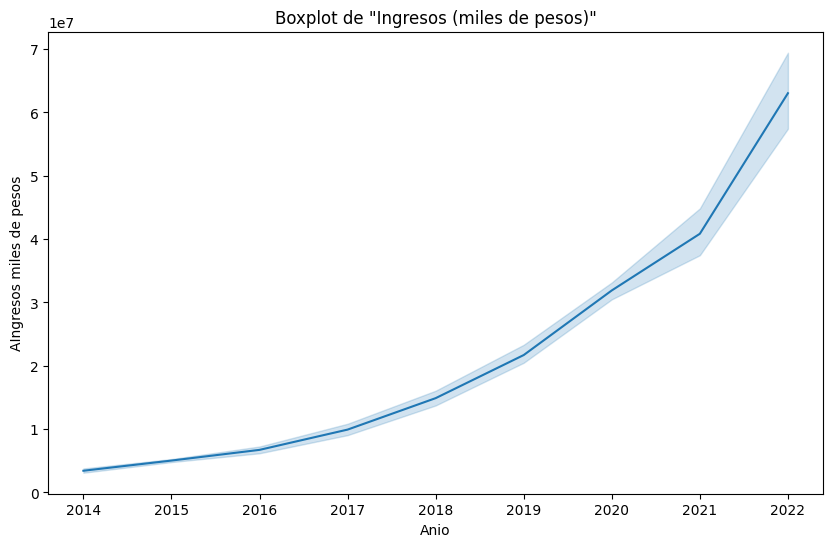

In [60]:
plt.figure(figsize=(10, 6))
sns.lineplot(x='Anio', y='Ingresos (miles de pesos)', data= dfIngresos)

plt.xlabel('Anio')
plt.ylabel('AIngresos miles de pesos')
plt.title('Boxplot de "Ingresos (miles de pesos)"')
plt.show()

En un país como Argentina, la inflación es un punto a tener en cuenta para analizar ganancias en una empresa. Los [datos de INDEC](https://www.indec.gob.ar/indec/web/Nivel4-Tema-3-5-31) (Instituto Nacional de Estadística y Censos de la República Argentina) son frecuentemente cuestionados por la veracidad de los datos, recurriremos entonces a una validación cruzada utilizando también el [precio del dólar BNA (Vendedor)](https://datos.gob.ar/series/api/series/?ids=168.1_T_CAMBIOR_D_0_0_26&limit=5000&representation_mode=value&chartType=column&collapse=quarter&collapse_aggregation=end_of_period) y trataremos de dar una comparación más acertada.

Datos tomados del INDEC:
-   [Variación interanual](_src/indec.png) , al mes de diciembre de cada año, para comunicaciones.
-   He tomado datos del archivo descargado desde INDEC y he realizado manualmente, por la dificultad que me presentó y el tiempo disponible para el análisis, una planilla donde calcule la inflación trimestral correspondiente a los años disponibles.

DataSet DOLAR:
-   Rango: enero 2015 - julio 2023.
-   Frecuencia: trimestral.
-   Agregación: Último valor del periodo.


In [61]:
dfAux = pd.read_csv('datos/Historico_dolar_bna.csv')            # Cargamos los datos del dolar para el analisis.

In [62]:
dfAux.head()

,indice_tiempo,tipo_cambio_bna_vendedor
0,2015-01-01,8.820
1,2015-04-01,9.085
2,2015-07-01,9.425
3,2015-10-01,13.300
4,2016-01-01,14.800


In [63]:
for fila in dfAux['indice_tiempo']:
    try:
        dfAux.loc[dfAux['indice_tiempo'] == fila, 'Anio'] = datetime.strptime(fila, '%Y-%m-%d').year         # Guardamos en una nueva columna, el anio.
        dfAux.loc[dfAux['indice_tiempo'] == fila, 'Trimestre'] = datetime.strptime(fila, '%Y-%m-%d').month         # Guardamos en una nueva columna, el mes.        
    except ValueError:
       dfAux.loc[dfAux['indice_tiempo'] == fila, 'Anio'] = None         # Si la fecha no es valida, guardamos un nan en su lugar.
       
dfAux['Anio'] = dfAux['Anio'].astype('int')         # Converimos el año a formato numerico.
dfAux['Trimestre'] = dfAux['Trimestre'].astype('int')         # Converimos el mes a formato numerico.

In [64]:
dfAux.head()

,indice_tiempo,tipo_cambio_bna_vendedor,Anio,Trimestre
0,2015-01-01,8.820,2015,1
1,2015-04-01,9.085,2015,4
2,2015-07-01,9.425,2015,7
3,2015-10-01,13.300,2015,10
4,2016-01-01,14.800,2016,1


In [65]:
dfAux['Trimestre'] = dfAux['Trimestre'].astype('str')         # Converimos el año a formato texto para poder realizar los remplazos de meses a trimestres.

dfAux['Trimestre'] = dfAux['Trimestre'].replace('1', '01')          # Remplazamos enero por 01, lo cual corresponde al primer trimestre.
dfAux['Trimestre'] = dfAux['Trimestre'].replace('4', '02')          # Remplazamos abril por 02, lo cual corresponde al segundo trimestre.
dfAux['Trimestre'] = dfAux['Trimestre'].replace('7', '03')          # Remplazamos julio por 03, lo cual corresponde al tercer trimestre.
dfAux['Trimestre'] = dfAux['Trimestre'].replace('10', '04')         # Remplazamos octubre por 04, lo cual corresponde al cuarto trimestre.

dfAux['Trimestre'] = dfAux['Trimestre'].astype('int')         # Converimos el año a formato numerico.

dfAux = dfAux.drop(['indice_tiempo'], axis = 1)           # Eliminamos columnas que no son necesarias.

In [66]:
dfAux.head()

,tipo_cambio_bna_vendedor,Anio,Trimestre
0,8.820,2015,1
1,9.085,2015,2
2,9.425,2015,3
3,13.300,2015,4
4,14.800,2016,1


In [67]:
dfIngresos = pd.merge(dfIngresos, dfAux, how = 'left', left_on = ('Anio', 'Trimestre'), right_on = ('Anio', 'Trimestre'))          # Juntamos los datos para realizar una analisis integral.
dfIngresos['Ingresos (miles de usd)'] = dfIngresos['Ingresos (miles de pesos)'] / dfIngresos['tipo_cambio_bna_vendedor']            # Creamos una nueva columna que muestre el precio en dolares.

dfIngresos['Ingresos (miles de usd)'] = dfIngresos['Ingresos (miles de usd)'].round(2)        # Redondeamos el nro a 2 decimales para una mejor visualizacion.

In [68]:
dfAux = pd.read_excel('datos/indec.xlsx')           # Ingresamos los datos del INDEC para el analisis.

dfIngresos = pd.merge(dfIngresos, dfAux, how = 'left', left_on = ('Anio', 'Trimestre'), right_on = ('Anio', 'Trimestre'))          # Juntamos los datos para realizar una analisis integral.
dfIngresos['Ingresos (seg. inflacion)'] = dfIngresos['Ingresos (miles de pesos)'] / dfIngresos['Acumulado']            # Creamos una nueva columna que muestre el ingreso, sin tener en cuenta la inflacion.
dfIngresos['Ingresos (seg. inflacion)'] = dfIngresos['Ingresos (seg. inflacion)'].round(2)        # Redondeamos el nro a 2 decimales para una mejor visualizacion.

In [69]:
dfAux.head()            # Los datos fueron cargados manualmente a una planilla de excel, como explique mas arriba, por la complejidad del excel original y el tiempo que tenemos para realizar el analisis.

,Anio,Trimestre,Acumulado
0,2017,1,1.1076
1,2017,2,1.2007
2,2017,3,1.2432
3,2017,4,1.3407
4,2018,1,1.5307


In [70]:
dfIngresos.head()

,Anio,Trimestre,Ingresos (miles de pesos),tipo_cambio_bna_vendedor,Ingresos (miles de usd),Acumulado,Ingresos (seg. inflacion)
0,2022,4,72443482.99,183.25,395325.96,8.3636,8661758.45
1,2022,3,64086784.33,153.25,418184.56,6.7815,9450237.31
2,2022,2,60419500.62,130.00,464765.39,6.0242,10029464.60
3,2022,1,55219313.01,116.00,476028.56,5.6121,9839331.62
4,2021,4,45467887.17,107.75,421975.75,4.9743,9140559.91


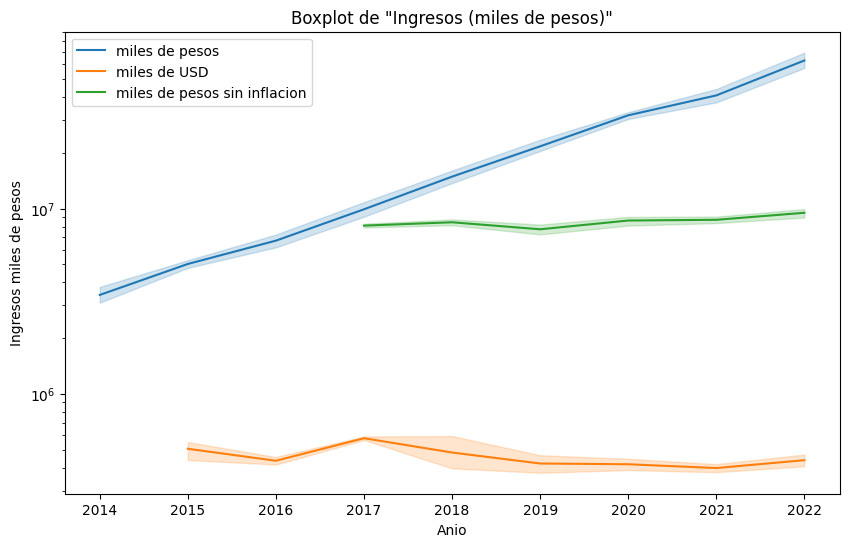

In [71]:
plt.figure(figsize=(10, 6))
sns.lineplot(x='Anio', y='Ingresos (miles de pesos)', data= dfIngresos, label="miles de pesos")
sns.lineplot(x='Anio', y='Ingresos (miles de usd)', data= dfIngresos, label="miles de USD")
sns.lineplot(x='Anio', y='Ingresos (seg. inflacion)', data= dfIngresos, label="miles de pesos sin inflacion")

plt.yscale("log")           # Por la diferencia numérica entre las variables, se toma una escala logarítmica para poder observarlos en un mismo gráfico.

plt.title('Boxplot de "Ingresos (miles de pesos)"')
plt.xlabel('Anio')
plt.ylabel('Ingresos miles de pesos')
plt.legend()

plt.show()

Podemos observar que los precios en pesos, como mencione antes, deben ser tratados con cuidado por la constante inflación que atraviesa el país. Si estas variables no se tuvieran en cuenta se podría pensar que se trata de un aumento indiscriminado.
En el grafico observamos:
-	Ingreso declarado en pesos. Con un aumento claramente visible.
-	Ingreso en USD. Manteniéndose dentro de cierto rango.
-	Ingreso en pesos, quitando los índices de inflación declarados por INDEC. Es una lastima que solo pude obtener datos desde el 2017 en adelante, pero igualmente podemos observar que la línea se mantiene prácticamente sin variación.

La conclusión que obtengo a través de los datos es que el aumento de los ingresos se ven influenciados por la inflación que atraviesa el país.

### ACCESOS POR VELOCIDAD, POR LOCALIDAD
Por la cantidad de datos se vuelve muy complicado a analizar correctamente este archivo, veremos sí hace falta para alguna métrica o si puedo trabajar directamente con el agrupado.

In [72]:
dfAccesosPorVelocidadPorLocalidad = pd.read_excel('datos/Internet_Accesos-por-velocidad_por loc.xlsx',sheet_name='internet_Accesos_por_loc')

In [73]:
dfAccesosPorVelocidadPorLocalidad.head()

,Provincia,Partido,Localidad,Link Indec,Otros,"0,256 Mbps","0,375 Mbps","0,5 Mbps","0,512 Mbps","0,625 Mbps",...,600 Mbps,680 Mbps,700 Mbps,800 Mbps,850 Mbps,900 Mbps,950 Mbps,1000 Mbps,1024 Mbps,Total general
0,BUENOS AIRES,25 de Mayo,25 de Mayo,6854100,NaN,NaN,NaN,2.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6208.0
1,BUENOS AIRES,25 de Mayo,Agustín Mosconi,6854010,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,59.0
2,BUENOS AIRES,25 de Mayo,Del Valle,6854020,NaN,NaN,NaN,1.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,192.0
3,BUENOS AIRES,25 de Mayo,Ernestina,6854030,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,66.0
4,BUENOS AIRES,25 de Mayo,Gobernador Ugarte,6854040,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,181.0


In [74]:
# En este set de datos aparece *Capital Federal* como *CABA*. Al ser una sola provincia la que está abreviada, realizare el remplazo con una linea de codigo en vez de agregar una columna "abreviacion" al dataframe de provincias.
dfAccesosPorVelocidadPorLocalidad['Provincia'] = dfAccesosPorVelocidadPorLocalidad['Provincia'].replace('CABA', 'Capital Federal')

dfAccesosPorVelocidadPorLocalidad['Provincia'] = dfAccesosPorVelocidadPorLocalidad['Provincia'].apply(lambda x: unidecode(x))         # Quitamos los signos ortográficos.
dfAccesosPorVelocidadPorLocalidad['Provincia'] = dfAccesosPorVelocidadPorLocalidad['Provincia'].str.title()         # Transformamos la provincia, que esta en mayusculas a  titulo. Para que coincida con nuestra tabla de provincias.
dfAccesosPorVelocidadPorLocalidad['id_provincia'] =  dfAccesosPorVelocidadPorLocalidad['Provincia'].map(dfProvincias.set_index('Provincia')['id'])         # Agrego el campo id_pronvincia, relacionado al dataframe creado anteriormente.
dfAccesosPorVelocidadPorLocalidad =  dfAccesosPorVelocidadPorLocalidad.drop('Provincia', axis = 1)            # Elimino la columnas provincia.

In [75]:
dfAccesosPorVelocidadPorLocalidad.head()

,Partido,Localidad,Link Indec,Otros,"0,256 Mbps","0,375 Mbps","0,5 Mbps","0,512 Mbps","0,625 Mbps","0,75 Mbps",...,680 Mbps,700 Mbps,800 Mbps,850 Mbps,900 Mbps,950 Mbps,1000 Mbps,1024 Mbps,Total general,id_provincia
0,25 de Mayo,25 de Mayo,6854100,NaN,NaN,NaN,2.0,NaN,NaN,19.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6208.0,1
1,25 de Mayo,Agustín Mosconi,6854010,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,59.0,1
2,25 de Mayo,Del Valle,6854020,NaN,NaN,NaN,1.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,192.0,1
3,25 de Mayo,Ernestina,6854030,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,66.0,1
4,25 de Mayo,Gobernador Ugarte,6854040,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,181.0,1


In [76]:
print( dfAccesosPorVelocidadPorLocalidad.shape)
print('-----------------------------------------------')
print( dfAccesosPorVelocidadPorLocalidad.dtypes)
print('-----------------------------------------------')
print('-----NULOS-------------------------------------')
print( dfAccesosPorVelocidadPorLocalidad.isnull().sum())

(3095, 134)
-----------------------------------------------
Partido           object
Localidad         object
Link Indec        object
Otros            float64
0,256 Mbps       float64
                  ...   
950 Mbps         float64
1000 Mbps        float64
1024 Mbps        float64
Total general    float64
id_provincia       int64
Length: 134, dtype: object
-----------------------------------------------
-----NULOS-------------------------------------
Partido             0
Localidad           0
Link Indec          0
Otros            2133
0,256 Mbps       3067
                 ... 
950 Mbps         3094
1000 Mbps        2751
1024 Mbps        3094
Total general       1
id_provincia        0
Length: 134, dtype: int64


In [77]:
dfAccesosPorVelocidadPorLocalidad.describe()

,Otros,"0,256 Mbps","0,375 Mbps","0,5 Mbps","0,512 Mbps","0,625 Mbps","0,75 Mbps",1 Mbps,"1,25 Mbps","1,5 Mbps",...,680 Mbps,700 Mbps,800 Mbps,850 Mbps,900 Mbps,950 Mbps,1000 Mbps,1024 Mbps,Total general,id_provincia
count,962.000000,28.000000,1.0,643.000000,523.000000,1.0,284.000000,891.000000,1.0,15.000000,...,1.0,3.0,4.000000,1.0,1.0,1.0,344.000000,1.0,3.094000e+03,3095.000000
mean,409.856549,3.464286,225.0,47.435459,2.214149,111.0,39.588028,83.405163,25.0,132.533333,...,1.0,1.0,159.000000,1.0,110.0,1.0,175.494186,1.0,3.622532e+03,10.489176
std,3830.231937,6.511995,NaN,1098.962748,5.000386,NaN,118.563946,315.399384,NaN,291.222268,...,NaN,0.0,260.008974,NaN,NaN,NaN,914.324632,NaN,3.025105e+04,7.522932
min,-4.000000,1.000000,225.0,0.000000,1.000000,111.0,1.000000,0.000000,25.0,7.000000,...,1.0,1.0,1.000000,1.0,110.0,1.0,1.000000,1.0,-4.000000e+00,1.000000
25%,1.000000,1.000000,225.0,1.000000,1.000000,111.0,3.000000,3.000000,25.0,31.000000,...,1.0,1.0,10.750000,1.0,110.0,1.0,7.000000,1.0,2.500000e+01,3.000000
50%,5.000000,1.000000,225.0,1.000000,1.000000,111.0,9.500000,13.000000,25.0,47.000000,...,1.0,1.0,44.500000,1.0,110.0,1.0,62.000000,1.0,1.600000e+02,9.000000
75%,50.000000,3.000000,225.0,2.500000,1.000000,111.0,28.000000,53.000000,25.0,75.000000,...,1.0,1.0,192.750000,1.0,110.0,1.0,160.000000,1.0,1.055500e+03,17.000000
max,106261.000000,31.000000,225.0,27866.000000,61.000000,111.0,1307.000000,6307.000000,25.0,1170.000000,...,1.0,1.0,546.000000,1.0,110.0,1.0,16708.000000,1.0,1.445665e+06,24.000000


### ACCESOS POR TECNOLOGIA, POR LOCALIDAD
Por la cantidad de datos se vuelve muy complicado a analizar correctamente este archivo, veremos sí hace falta para alguna métrica o si puedo trabajar directamente con el agrupado.

In [78]:
dfAccesoPorTecnologiaPorLocalidad = pd.read_excel('datos/Internet-Accesos-por-tecno_por_loc.xlsx',sheet_name='Accesos_tecnologia_localidad')

In [79]:
dfAccesoPorTecnologiaPorLocalidad.head()

,Provincia,Partido,Localidad,Link Indec,ADSL,CABLEMODEM,DIAL UP,FIBRA OPTICA,OTROS,SATELITAL,WIMAX,WIRELESS,Total general
0,BUENOS AIRES,25 de Mayo,25 de Mayo,6854100,874,4542,0,3,0,852,0,706,6977
1,BUENOS AIRES,25 de Mayo,Del Valle,6854020,181,0,0,0,10,1,0,0,192
2,BUENOS AIRES,25 de Mayo,Gobernador Ugarte,6854040,0,0,0,0,0,0,0,181,181
3,BUENOS AIRES,25 de Mayo,Norberto de la Riestra,6854060,0,782,0,6,167,0,0,327,1282
4,BUENOS AIRES,25 de Mayo,Lucas Monteverde,6854050,0,0,0,0,0,0,0,6,6


In [80]:
# En este set de datos aparece *Capital Federal* como *CABA*. Al ser una sola provincia la que está abreviada, realizare el remplazo con una linea de codigo en vez de agregar una columna "abreviacion" al dataframe de provincias.
dfAccesoPorTecnologiaPorLocalidad['Provincia'] = dfAccesoPorTecnologiaPorLocalidad['Provincia'].replace('CABA', 'Capital Federal')

dfAccesoPorTecnologiaPorLocalidad['Provincia'] = dfAccesoPorTecnologiaPorLocalidad['Provincia'].apply(lambda x: unidecode(x))         # Quitamos los signos ortográficos.
dfAccesoPorTecnologiaPorLocalidad['Provincia'] = dfAccesoPorTecnologiaPorLocalidad['Provincia'].str.title()         # Transformamos la provincia, que esta en mayusculas a  titulo. Para que coincida con nuestra tabla de provincias.
dfAccesoPorTecnologiaPorLocalidad['id_provincia'] =  dfAccesoPorTecnologiaPorLocalidad['Provincia'].map(dfProvincias.set_index('Provincia')['id'])         # Agrego el campo id_pronvincia, relacionado al dataframe creado anteriormente.
dfAccesoPorTecnologiaPorLocalidad =  dfAccesoPorTecnologiaPorLocalidad.drop('Provincia', axis = 1)            # Elimino la columnas provincia.

In [81]:
dfAccesoPorTecnologiaPorLocalidad.head()

,Partido,Localidad,Link Indec,ADSL,CABLEMODEM,DIAL UP,FIBRA OPTICA,OTROS,SATELITAL,WIMAX,WIRELESS,Total general,id_provincia
0,25 de Mayo,25 de Mayo,6854100,874,4542,0,3,0,852,0,706,6977,1
1,25 de Mayo,Del Valle,6854020,181,0,0,0,10,1,0,0,192,1
2,25 de Mayo,Gobernador Ugarte,6854040,0,0,0,0,0,0,0,181,181,1
3,25 de Mayo,Norberto de la Riestra,6854060,0,782,0,6,167,0,0,327,1282,1
4,25 de Mayo,Lucas Monteverde,6854050,0,0,0,0,0,0,0,6,6,1


In [82]:
print( dfAccesoPorTecnologiaPorLocalidad.shape)
print('-----------------------------------------------')
print( dfAccesoPorTecnologiaPorLocalidad.dtypes)
print('-----------------------------------------------')
print('-----NULOS-------------------------------------')
print( dfAccesoPorTecnologiaPorLocalidad.isnull().sum())

(3137, 13)
-----------------------------------------------
Partido          object
Localidad        object
Link Indec       object
ADSL              int64
CABLEMODEM        int64
DIAL UP           int64
FIBRA OPTICA      int64
OTROS             int64
SATELITAL         int64
WIMAX             int64
WIRELESS          int64
Total general     int64
id_provincia      int64
dtype: object
-----------------------------------------------
-----NULOS-------------------------------------
Partido          0
Localidad        0
Link Indec       0
ADSL             0
CABLEMODEM       0
DIAL UP          0
FIBRA OPTICA     0
OTROS            0
SATELITAL        0
WIMAX            0
WIRELESS         0
Total general    0
id_provincia     0
dtype: int64


In [83]:
dfAccesoPorTecnologiaPorLocalidad.describe()

,ADSL,CABLEMODEM,DIAL UP,FIBRA OPTICA,OTROS,SATELITAL,WIMAX,WIRELESS,Total general,id_provincia
count,3137.000000,3.137000e+03,3137.000000,3137.000000,3137.000000,3137.000000,3137.000000,3137.000000,3.137000e+03,3137.000000
mean,419.309213,1.924596e+03,3.967485,975.637552,64.918712,1.108065,0.691106,182.648709,3.572877e+03,10.517692
std,3073.660025,2.363409e+04,44.745777,6599.934747,833.688135,15.515385,14.933928,705.881401,3.165879e+04,7.489390
min,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,1.000000
25%,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.400000e+01,4.000000
50%,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,23.000000,1.560000e+02,9.000000
75%,115.000000,7.000000e+00,0.000000,83.000000,0.000000,1.000000,0.000000,120.000000,1.012000e+03,17.000000
max,138753.000000,1.238196e+06,2145.000000,222066.000000,29586.000000,852.000000,444.000000,20490.000000,1.551926e+06,24.000000


### MAPA DE CONECTIVIDAD

Por la cantidad de datos se vuelve muy complicado a analizar correctamente este archivo, veremos sí hace falta para alguna métrica.

In [84]:
dfConectividad = pd.read_excel('datos/mapa_conectividad.xlsx',sheet_name='Hoja3')

In [85]:
dfConectividad.head()

,Provincia,Partido,Localidad,Población,ADSL,Cablemódem,Dial Up,Fibra óptica,Satelital,Wireless,Telefonía Fija,3G,4G,Link,Latitud,Longitud
0,BUENOS AIRES,9 de Julio,Alfredo Demarchi (Est. Facundo Quiroga),1853,SI,--,--,--,--,--,SI,SI,SI,6588010.0,-35.292982,-61.407254
1,BUENOS AIRES,9 de Julio,Carlos María Naón,497,--,--,--,--,--,--,SI,SI,SI,6588020.0,-35.239499,-60.825136
2,BUENOS AIRES,9 de Julio,Dudignac,2670,--,--,SI,--,--,SI,SI,SI,SI,6588040.0,-35.651193,-60.709896
3,BUENOS AIRES,9 de Julio,La Aurora (Est. La Niña),531,--,--,--,--,--,--,--,--,SI,6588050.0,-35.407947,-61.210567
4,BUENOS AIRES,9 de Julio,Manuel B. Gonnet (Est. French),748,SI,--,--,SI,--,--,SI,SI,SI,6588060.0,-35.520141,-60.998949


In [86]:
# En este set de datos aparece *Capital Federal* como *CABA*. Al ser una sola provincia la que está abreviada, realizare el remplazo con una linea de codigo en vez de agregar una columna "abreviacion" al dataframe de provincias.
dfConectividad['Provincia'] = dfConectividad['Provincia'].replace('CABA', 'Capital Federal')

dfConectividad['Provincia'] = dfConectividad['Provincia'].apply(lambda x: unidecode(x))         # Quitamos los signos ortográficos.
dfConectividad['Provincia'] = dfConectividad['Provincia'].str.title()         # Transformamos la provincia, que esta en mayusculas a  titulo. Para que coincida con nuestra tabla de provincias.
dfConectividad['id_provincia'] =  dfConectividad['Provincia'].map(dfProvincias.set_index('Provincia')['id'])         # Agrego el campo id_pronvincia, relacionado al dataframe creado anteriormente.

dfConectividad =  dfConectividad.drop('Provincia', axis = 1)            # Elimino la columnas provincia.

In [87]:
dfConectividad['ADSL'] = [1 if valor == 'SI' else 0 for valor in dfConectividad['ADSL']]
dfConectividad['Cablemódem'] = [1 if valor == 'SI' else 0 for valor in dfConectividad['Cablemódem']]
dfConectividad['Dial Up'] = [1 if valor == 'SI' else 0 for valor in dfConectividad['Dial Up']]
dfConectividad['Fibra óptica'] = [1 if valor == 'SI' else 0 for valor in dfConectividad['Fibra óptica']]
dfConectividad['Satelital'] = [1 if valor == 'SI' else 0 for valor in dfConectividad['Satelital']]
dfConectividad['Wireless'] = [1 if valor == 'SI' else 0 for valor in dfConectividad['Wireless']]
dfConectividad['Telefonía Fija'] = [1 if valor == 'SI' else 0 for valor in dfConectividad['Telefonía Fija']]
dfConectividad['3G'] = [1 if valor == 'SI' else 0 for valor in dfConectividad['3G']]
dfConectividad['4G'] = [1 if valor == 'SI' else 0 for valor in dfConectividad['4G']]

In [88]:
dfConectividad.head()

,Partido,Localidad,Población,ADSL,Cablemódem,Dial Up,Fibra óptica,Satelital,Wireless,Telefonía Fija,3G,4G,Link,Latitud,Longitud,id_provincia
0,9 de Julio,Alfredo Demarchi (Est. Facundo Quiroga),1853,1,0,0,0,0,0,1,1,1,6588010.0,-35.292982,-61.407254,1
1,9 de Julio,Carlos María Naón,497,0,0,0,0,0,0,1,1,1,6588020.0,-35.239499,-60.825136,1
2,9 de Julio,Dudignac,2670,0,0,1,0,0,1,1,1,1,6588040.0,-35.651193,-60.709896,1
3,9 de Julio,La Aurora (Est. La Niña),531,0,0,0,0,0,0,0,0,1,6588050.0,-35.407947,-61.210567,1
4,9 de Julio,Manuel B. Gonnet (Est. French),748,1,0,0,1,0,0,1,1,1,6588060.0,-35.520141,-60.998949,1


In [89]:
print( dfConectividad.shape)
print('-----------------------------------------------')
print( dfConectividad.dtypes)
print('-----------------------------------------------')
print('-----NULOS-------------------------------------')
print( dfConectividad.isnull().sum())

(4311, 16)
-----------------------------------------------
Partido            object
Localidad          object
Población           int64
ADSL                int64
Cablemódem          int64
Dial Up             int64
Fibra óptica        int64
Satelital           int64
Wireless            int64
Telefonía Fija      int64
3G                  int64
4G                  int64
Link              float64
Latitud           float64
Longitud          float64
id_provincia        int64
dtype: object
-----------------------------------------------
-----NULOS-------------------------------------
Partido            0
Localidad          0
Población          0
ADSL               0
Cablemódem         0
Dial Up            0
Fibra óptica       0
Satelital          0
Wireless           0
Telefonía Fija     0
3G                 0
4G                 0
Link              12
Latitud            0
Longitud           0
id_provincia       0
dtype: int64


In [90]:
dfConectividad.describe()

,Población,ADSL,Cablemódem,Dial Up,Fibra óptica,Satelital,Wireless,Telefonía Fija,3G,4G,Link,Latitud,Longitud,id_provincia
count,4.311000e+03,4311.000000,4311.000000,4311.000000,4311.000000,4311.000000,4311.000000,4311.000000,4311.000000,4311.000000,4.299000e+03,4311.000000,4311.000000,4311.000000
mean,8.695088e+03,0.261888,0.200186,0.093482,0.354210,0.246579,0.515890,0.520297,0.436094,0.597077,3.909339e+07,-32.261794,-63.039123,10.421248
std,3.821965e+04,0.439713,0.400186,0.291140,0.478329,0.431069,0.499805,0.499646,0.495957,0.490542,2.939438e+07,4.999418,3.830260,7.464860
min,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000010e+06,-77.874009,-72.891627,1.000000
25%,1.160000e+02,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.009104e+07,-34.707626,-65.687041,3.000000
50%,5.760000e+02,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,3.400705e+07,-32.283511,-63.450636,9.000000
75%,3.203000e+03,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,6.612602e+07,-28.584663,-60.008572,17.000000
max,1.317298e+06,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,9.401402e+07,-21.817293,-34.626560,24.000000


### Realizamos la exportación de los archivos.

In [91]:
### EXPORTAMOS A .CSV LOS DATAFRAMES ###
os.makedirs('Resultados', exist_ok=True)

dfProvincias.to_csv('resultados/provincicas.csv', sep=";", decimal=",")
dfPenetracionHogares.to_csv('resultados/penetracionHogares.csv', sep=";", decimal=",")
dfBandaAnchaFija.to_csv('resultados/bandaAnchaFija.csv', sep=";", decimal=",")
dfAccesoPorTecnologia.to_csv('resultados/accesoPorTecnologia.csv', sep=";", decimal=",")
dfHistoricoVelocidad.to_csv('resultados/historicoVelocidad.csv', sep=";", decimal=",")
dfAccesosPorVelocidad.to_csv('resultados/accesosPorVelocidad.csv', sep=";", decimal=",")
dfAccesosPorVelocidadAbierto.to_csv('resultados/accesosPorVelocidadAbierto.csv', sep=";", decimal=",")
dfIngresos.to_csv('resultados/ingresos.csv', sep=";", decimal=",")
dfAccesosPorVelocidadPorLocalidad.to_csv('resultados/accesosPorVelocidadPorLocalidad.csv', sep=";", decimal=",")
dfAccesoPorTecnologiaPorLocalidad.to_csv('resultados/accesoPorVelocidadPorLocalidad.csv', sep=";", decimal=",")
dfConectividad.to_csv('resultados/conectividad.csv', sep=";", decimal=",")